# 4. Gyakorlat - Vasúti ütközőbak
2021.03.01

## Feladat:

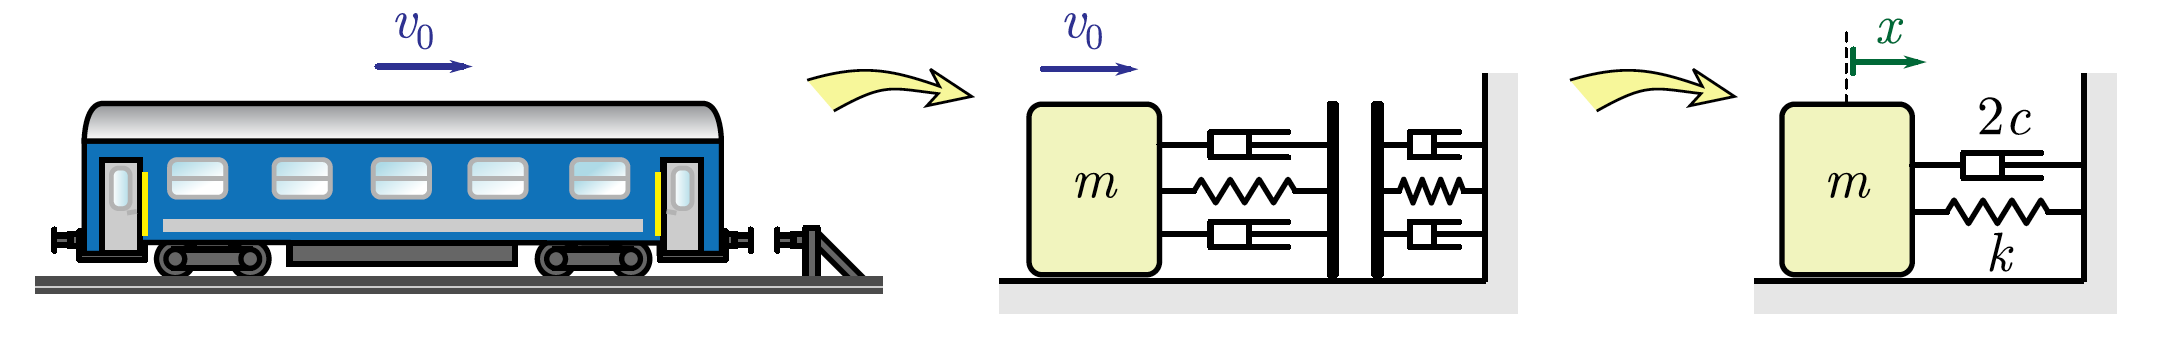

In [1]:
from IPython.display import Image
Image(filename='gyak4_1.png',width=900)

A mellékelt ábrán látható módon egy $m$ tömegű vasúti szerlvény egy ütközőbakba csapódik $v_0$ kezdősebességgel. Feltételezzük, hogy a folyamat során a bak mozdulatlan marad. Modellezvén a bak elaszticitását és energia disszipációját, a fenti ábrán látható mechanikai modellt használjuk. Miközben a szerelvény ütközője érintezik a bak ütközőjével, kettejük rugómerevségét és csillapítási tényezőjét kombinálhatjuk egy $k$ eredő rugómerevséggé, valamint egy $2c$ nagyságú eredő csillapítási tényezővé.

### Adatok:

|                       |                       |
|:-----------------------|-----------------------|
| $m$ = 5$\cdot$10$^4$ kg | $v_0$ = 1 m/s         |
| $k$ = 10$^6$ N/m | $c$ = 10$^5$ Ns/m |



### Részfeladatok:
1. Számítsa ki az ütközés során a rugóban ébredő maximális erőt!
2. Határozza meg az ütközés során elnyelt energiát!

## Megoldás:

### 1. Feladat

További részletezés nélkül a mozgásegyenlet:

$$m\ddot{x} + 2c\dot{x} + kx = 0.$$

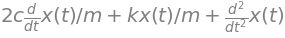

In [2]:
import sympy as sp
from IPython.display import Math # hogy tudjunk LaTeX szöveget kiírni

sp.init_printing()

m,c,k,ζ,ω_n,ω_d,v_0,t = sp.symbols('m,c,k,ζ,ω_n,ω_d,v_0,t')
x = sp.Function('x')(t)

# Készítsünk behelyettesítési listát az adatok alapján, SI-ben
adatok = [(m, 5*10**4), (v_0, 1), (k, 10**6), (c, 10**5)]

mozgasegy = m*sp.diff(x,t,2) + 2*c*sp.diff(x,t,1) + k*x

# Osszunk le a főegyütthatóval:
foegyutthato = mozgasegy.coeff(sp.diff(x,t,2))

mozgasegy = (mozgasegy/foegyutthato).expand()

mozgasegy

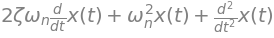

In [3]:
mozgasegy = mozgasegy.subs([(2*c/m,2*ζ*ω_n),(k/m,ω_n**2)])
mozgasegy

In [4]:
ω_n_num = sp.sqrt(k/m).subs(adatok)

display(Math('\omega_n = {}'.format(sp.latex(ω_n_num))))

# rad/s

<IPython.core.display.Math object>

In [5]:
ζ_num = (c/m/ω_n).subs(adatok).subs(ω_n,ω_n_num)

display(Math('\zeta = {}'.format(sp.latex(ζ_num))))

# 1

<IPython.core.display.Math object>

In [6]:
ω_d_num = (ω_n*sp.sqrt(1-ζ**2)).subs(adatok).subs(ω_n,ω_n_num).subs(ζ,ζ_num)

display(Math('\omega_d = {}'.format(sp.latex(ω_d_num))))

# rad/s

<IPython.core.display.Math object>

In [7]:
T_d_num = ((2*sp.pi)/ω_d).subs(adatok).subs(ω_d,ω_d_num)

display(Math('T_d = {}'.format(sp.latex(T_d_num))))

# s

<IPython.core.display.Math object>

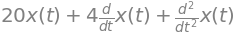

In [8]:
mozgasegy_num = mozgasegy.subs([(ζ,ζ_num),(ω_n,ω_n_num)])
mozgasegy_num # természetesen ez a bal oldal, amennyiben a jobb oldal 0

In [9]:
# Oldjuk meg a mozgásegyenletet előszőr 
# az integrálási konstansok kézi meghatározásával.

# általános megoldás:
alt_meg = sp.dsolve(mozgasegy_num,x).rhs  # right hand side
alt_meg  # figyelem, itt az eredeti kidolgozásban pont fordítva van C1 és C2!

In [10]:
# Általános megoldás deriváltja:
d_alt_meg = sp.diff(alt_meg,t)
d_alt_meg

In [11]:
# Kezedit értékek: x(0) = 0, v(0) = v0.
# C1, C2 konstansok kifejezése:
v0, C1, C2 = sp.symbols("v0, C1, C2")

# Oldjuk meg az egyenletrendszert C1 és C2-re. 
konst = sp.solve([alt_meg.subs(t,0),d_alt_meg.subs(t,0)-v0],C1, C2)
C1_num = konst[C1]
C2_num = konst[C2]

display(Math('C_1 = {},'.format(sp.latex(konst[C1]))))
display(Math('C_2 = {}.'.format(sp.latex(konst[C2]))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
alt_meg.subs([(C1,C1_num),(C2,C2_num)])

In [13]:
# Most pedig értékeljük, hogy a sympy a fentieket 
# automatikusan is képes elvégezni:

kezdeti_ert = {x.subs(t,0): 0, x.diff(t).subs(t,0): v_0} 
display(kezdeti_ert)

mozg_torv = sp.dsolve(mozgasegy_num,x,ics=kezdeti_ert)
mozg_torv

⎧         ⎛d       ⎞│       ⎫
⎨x(0): 0, ⎜──(x(t))⎟│   : v₀⎬
⎩         ⎝dt      ⎠│t=0    ⎭

Maximális rugóerő a maximális kitérésnél: keressük a maximális kitéréshez tartozó $t^*$ időt:

In [14]:
# A maximumban a derivált értéke zérus.
# Itt már felhasználhatjuk azt, hogy C2 = 0
d_alt_meg.subs(C2,0)

In [15]:
# Megoldva az egyenletet t-re:
meg = sp.solve(d_alt_meg.subs(C2,0),t)
t_csillag = meg[0]

display(Math('t^* = {}'.format(t_csillag.evalf(4))))

# s

<IPython.core.display.Math object>

In [16]:
# Visszahelyettesítve a mozgástörvénybe:
x_max = mozg_torv.rhs.subs(t,t_csillag).subs(v_0,1)

display(Math('x_{{max}} = {}'.format(x_max.evalf(4))))

# m

<IPython.core.display.Math object>

In [17]:
# Amiből a maximális rugóerő:
F_max = (k*x_max).subs(adatok)


display(Math('F_{{r,max}} = {}'.format(F_max.evalf(5)/1000)))

# kN

<IPython.core.display.Math object>

## Második feladat

In [18]:
# Newton II-ből a mozdony által az ütközőre ható erő
kontakt_egy = sp.Eq(k*alt_meg+2*c*d_alt_meg,0)
kontakt_egy = kontakt_egy.subs(C2,0).simplify()
kontakt_egy

In [19]:
# Oldjuk meg t-re, felhasználva, hogy C2 = 0 és C1 ≠ 0: 
kontakt_megold = sp.solve(kontakt_egy.subs(adatok),t)
display(kontakt_megold) 

# a 2 megoldás közül a legkisebb kell, ami még pozitív.
# Módszer: `ternary operator`, ami könnyen olvasható és értelmezhető.
t_cscs = kontakt_megold[0] if 0 < kontakt_megold[0] < kontakt_megold[1] else kontakt_megold[1] 

display(Math('t^{{**}} = {}'.format(t_cscs.evalf(4))))

# s

<IPython.core.display.Math object>

In [20]:
# A mozdony sebessége az elválás pillanatában (t** időpontban)

v_t = mozg_torv.rhs.diff(t) # mozgástörvény deriváltja -> sebesség
v_tcscs = v_t.subs(t,t_cscs).subs(adatok).evalf(4)

display(Math('v_{{t^{{**}}}} = {}'.format(v_tcscs.evalf(4))))

# m/s

<IPython.core.display.Math object>

In [21]:
# A kinetikus energia megváltozása a munkavégzéssel egyenlő:
W_diss = (1/2*m*v_tcscs**2-1/2*m*v_0**2).subs(adatok)

# A disszipált energia ennek mínusz egyszerese
display(Math('E^\mathrm{{diss}} = {}'.format(-W_diss.evalf(4)/1000)))

# kJ

<IPython.core.display.Math object>

Készítette: 

            Juhos-Kiss Álmos (Alkalmazott Mechanika Szakosztály) és 
            Csuzdi Domonkos (Alkalmazott Mechanika Szakosztály) 
            Takács Dénes (BME MM) ábrái és Vörös Illés (BME MM) kidolgozása alapján.

            Hibák, javaslatok:
            amsz.bme@gmail.com
            csuzdi02@gmail.com
            almosjuhoskiss@gmail.com

            2021.03.01
        